<h1 style="color: rgb(0, 91, 94);">Fourier Transform</h1>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">Introduction</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Within this repository, we will be exploring the concept of <b>Fourier Transform</b>, its definition, application and general usefulness. It is important to discuss these in detail to provide a solid understanding of the principles of Fourier Transform.

There are many applications of a Fourier Transform, which we will discuss as well.

<h2 style="color: rgb(0, 91, 94);">Fourier Transform: Definition</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

To give a understanding to what Fourier Transform is, we must first define what exactly a Fourier Transform is. Originally discussed by the French mathmatician <i>Jean Baptiste Fourier</i>, he described the Fourier Transform to be a mathematical procedure which decomposes and transforms functions into frequency components (from a time domain to a frequency domain.<sup><a href="#references">[1]</a></sup>

Fourier Transform is one of two Fourier expansions which fall under the category of Fourier Analysis. We will also talk about the Inverse Fourier Transform, breaking down it's application in both definition and in code.

The Fourier analysis can be described as the study of general functions which may be represented or decomposed into "trigonometric or exponential functions with definite frequencies".<sup><a href="#references">[2]</a></sup>

The usage of Fourier analysis can be used in a myriad of ways, whether developing computer models or processing and analysing data. 

Fourier Transforms are used for <i>non-periodic</i> functions that can be written into trigometric or exponential functions with a "continuum of possible frequencies". Since these functions can be written in sinusoidal functions, this helps to focus on these functions when solving differing equations, which is easier than using general functions.<sup><a href="#references">[1]</a></sup> Essentially this means we can break down waveforms in a different representation of sines and cosines

<h2 style="color: rgb(0, 91, 94);">Fourier Transform: Application</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

$$
y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{kn}{N}} x[n]
$$

The following formula is is called <b><i>Fast Fourier Transform (FFT)</i></b>, deriving from discrete fourier transforms. Discrete Fourier Transforms are defined by when a given function and its Fourier transform are replaced with "discretized counterparts" (values which are individual and countable).<sup><a href="#references">[3]</a></sup> The below image gives a visual example of this. The purpose of this is to make computations in a faster manner.

<img src="https://learn.g2.com/hs-fs/hubfs/G2CR_B071_Discrete_vs_Continuous_Data_V1.png?width=866"><a href="https://learn.g2.com/hs-fs/hubfs/G2CR_B071_Discrete_vs_Continuous_Data_V1.png?width=866"><center><b>Source</b></center></a></img>


To attempt to use this formula by hand can be seen from a following example done within the lectures of this module on the topic of Fourier Transform.

In [3]:
# Numerical arrays
import numpy as np

x = np.array([1.0, 2.0, 3.0, -1.0, 1.5])

# Used as our output arrays
y = []

N = len(x)

for k in range(N):
    y_k = 0.0
    for n in range(N):
        y_k = y_k + (np.e**(-2 * np.pi * 1j * k * n / N) * x[n])
    y.append(y_k)
    
np.array(y)

array([224.625+0.00000000e+00j,  -0.375+7.16190699e+01j,
        -0.375+3.58085532e+01j,  -0.375+2.38712779e+01j,
        -0.375+1.79023130e+01j,  -0.375+1.43206722e+01j,
        -0.375+1.19326935e+01j,  -0.375+1.02268073e+01j,
        -0.375+8.94722895e+00j,  -0.375+7.95185580e+00j,
        -0.375+7.15542626e+00j,  -0.375+6.50368296e+00j,
        -0.375+5.96045432e+00j,  -0.375+5.50069846e+00j,
        -0.375+5.10652834e+00j,  -0.375+4.76482678e+00j,
        -0.375+4.46575590e+00j,  -0.375+4.20179261e+00j,
        -0.375+3.96708562e+00j,  -0.375+3.75701549e+00j,
        -0.375+3.56788667e+00j,  -0.375+3.39670751e+00j,
        -0.375+3.24103030e+00j,  -0.375+3.09883302e+00j,
        -0.375+2.96843066e+00j,  -0.375+2.84840779e+00j,
        -0.375+2.73756676e+00j,  -0.375+2.63488734e+00j,
        -0.375+2.53949503e+00j,  -0.375+2.45063597e+00j,
        -0.375+2.36765682e+00j,  -0.375+2.28998851e+00j,
        -0.375+2.21713313e+00j,  -0.375+2.14865312e+00j,
        -0.375+2.08416238e+00j,

Let us see the use of this formula with an example from the <i>SciPy Python library</i>, which is mainly used for scientific computing.<sup><a href="#references">[4]</a></sup>


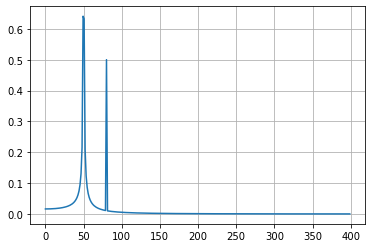

In [2]:
from scipy.fft import fft, fftfreq

import numpy as np

# Number of sample points

N = 600

# sample spacing

T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)

xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()

plt.show()

In [2]:
def add(x,y):
    return (x[0] + y[0],x[1]+y[1])

In [3]:
add(x,y)

(1, 12)

In [4]:
def mul(x,y):
    a, b = x
    c, d = y
    return (a * c - b * d,a * d + b * c)

In [5]:
mul(x,y)

(-41, 1)

In [6]:
(3 + 7j) + (-2 + 5j)

(1+12j)

Explore complex numbers (why multiplication is as it is etc.)

In [7]:
class Complex():
    def __init__(self,a,b):
        self.a = a
        self.b = b
        
    def __add__(self, other):
        return Complex(self.a + other.a, self.b + other.b)
    
    def __mul__(self, other):
        a, b = self.a, self.b
        c, d = other.a, other.b
        return Complex(a*c - b*d, a*d + b*c)
    
    def __repr__(self):
        return f'Complex({self.a},{self.b})'

In [8]:
Complex(3,7)

Complex(3,7)

In [9]:
Complex(-2,5)

Complex(-2,5)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
x = np.linspace(-6.0,6.0,1000)
y = x**2 - 16

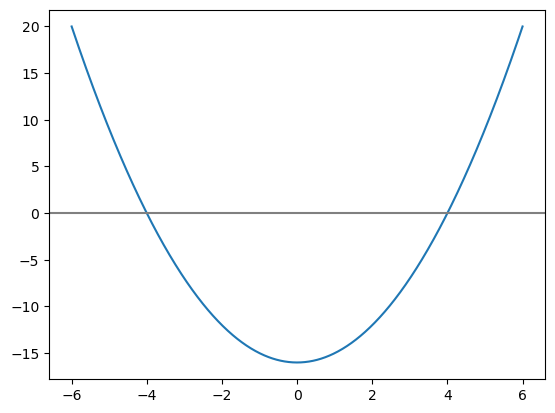

In [12]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.axhline(0.0,color='grey')

<h2 style="color: rgb(0, 91, 94);">References</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<div id="references">
    <p>
        [1] Ijirset (Journal): <a href="http://www.ijirset.com/upload/2018/november/46_Applications%20of%20Fourier%20transform%20in%20Engineering%20Field%20_1_.pdf">Applications of Fourier Transform in Engineering Field</a><br><br>
        [2] Scholars at Harvard (Notes): <a href="https://scholar.harvard.edu/files/david-morin/files/waves_fourier.pdf">Fourier analysis</a><br><br>  
        [3] G2 - Business Software Reviews: <a href="https://www.g2.com/articles/discrete-vs-continuous-data">Discrete vs. Continuous Data</a><br><br>  
        [4] SciPy: Documentation: <a href="https://docs.scipy.org/doc/scipy/tutorial/fft.html">Fourier Transforms</a><br><br>  
</div>


<!--<sup><a href="#references">[5]</a></sup>!-->